# Regresión Logística y Softmax

En este _Notebook_ vamos a aprender a utilizar el modelo de Regresión Logística y Regresión _Softmax_ de Scikit Learn. Para esto, vamos a volver a utilizar el _dataset_ de las flores Iris. 

## Regresión Logística

Lo primero que haremos será predecir si una flor es _Iris Virginica_ solamente en base al ancho de su pétalo. Para esto primero cargamos el _dataset_.

In [1]:
import numpy as np
from sklearn import datasets

iris = datasets.load_iris()
X = iris['data'][:, 3:] # Nos quedamos solamente con el ancho del pétalo
y = (iris['target'] == 2).astype(np.int) # Dejamos True en las filas que son Virginica

Ahora vamos a importar el modelo y lo vamos a entrenar.

In [2]:
from sklearn.linear_model import LogisticRegression

log_reg = LogisticRegression()
log_reg.fit(X, y)

LogisticRegression()

Ahora vamos a graficar cómo se comporta este modelo para distintos tamaños de pétalo.

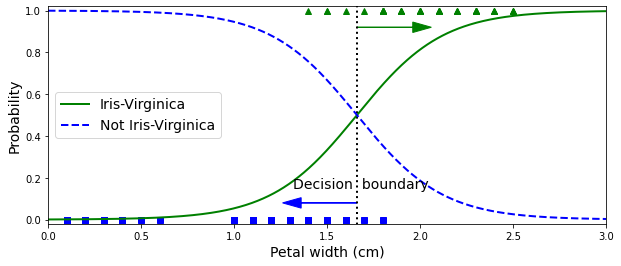

In [3]:
import matplotlib.pyplot as plt

X_new = np.linspace(0, 3, 1000).reshape(-1, 1) # Creamos mil valores entre el 0 y el 3 que representarán anchos de pétalo
y_proba = log_reg.predict_proba(X_new) # Predecimos para todos esos valores, pero obtenemos la probabilidad.
decision_boundary = X_new[y_proba[:, 1] >= 0.5][0] # Buscamos el valor de X donde la probabilidad se hace >= a 0.5

plt.figure(figsize=(10, 4))
plt.plot(X[y==0], y[y==0], "bs")
plt.plot(X[y==1], y[y==1], "g^")
plt.plot([decision_boundary, decision_boundary], [-1, 2], "k:", linewidth=2)
plt.plot(X_new, y_proba[:, 1], "g-", linewidth=2, label="Iris-Virginica")
plt.plot(X_new, y_proba[:, 0], "b--", linewidth=2, label="Not Iris-Virginica")
plt.text(decision_boundary+0.02, 0.15, "Decision  boundary", fontsize=14, color="k", ha="center")
plt.arrow(decision_boundary, 0.08, -0.3, 0, head_width=0.05, head_length=0.1, fc='b', ec='b')
plt.arrow(decision_boundary, 0.92, 0.3, 0, head_width=0.05, head_length=0.1, fc='g', ec='g')
plt.xlabel("Petal width (cm)", fontsize=14)
plt.ylabel("Probability", fontsize=14)
plt.legend(loc="center left", fontsize=14)
plt.axis([0, 3, -0.02, 1.02])
plt.show()

Los cuadrados azules son anchos de pétalo de flores que no son _Iris Virginica_, mientras que los triángulos verde son anchos para flores _Iris Virginica_. Vemos que a partir del ancho 1.6 aproximadamente el modelo comienza a predecir que una flor sí es _Iris_virginica_. Ahora vamos a ver un ejemplo para predecir dos anchos.

In [4]:
log_reg.predict([[1.7], [1.5]])

array([1, 0])

Ahora vamos a repetir el procedimiento, pero nuestras _features_ van a ser el largo y el ancho del pétalo.

In [5]:
X = iris["data"][:, (2, 3)]  # Largo del pétalo, ancho del pétalo
y = (iris["target"] == 2).astype(np.int)

log_reg = LogisticRegression(penalty='none')
log_reg.fit(X, y)

LogisticRegression(penalty='none')

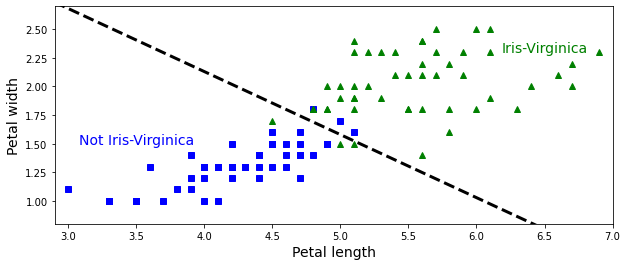

In [6]:
plt.figure(figsize=(10, 4))
plt.plot(X[y==0, 0], X[y==0, 1], "bs")
plt.plot(X[y==1, 0], X[y==1, 1], "g^")

left_right = np.array([2.9, 7])

# Hacemos una linea que divida las dos clases
boundary = -(log_reg.coef_[0][0] * left_right + log_reg.intercept_[0]) / log_reg.coef_[0][1]

plt.plot(left_right, boundary, "k--", linewidth=3)
plt.text(3.5, 1.5, "Not Iris-Virginica", fontsize=14, color="b", ha="center")
plt.text(6.5, 2.3, "Iris-Virginica", fontsize=14, color="g", ha="center")
plt.xlabel("Petal length", fontsize=14)
plt.ylabel("Petal width", fontsize=14)
plt.axis([2.9, 7, 0.8, 2.7])
plt.show()

## Regresión Softmax

Ahora en vez de decir si una flor es o no _Iris Virginica_, vamos a decir que tipo de flor es. Para esto usaremos el modelo de regresión _Softmax_.

In [27]:
X = iris['data'][:, (2, 3)] # Largo y ancho del pétalo
y = iris["target"]

# Si no agregamos multinomial hará One-versus-the-rest con modelos de regresión logística
softmax_reg = LogisticRegression(multi_class='multinomial')
softmax_reg.fit(X, y)

LogisticRegression(multi_class='multinomial')

In [28]:
softmax_reg.predict([[5, 2]])

array([2])